<a href="https://colab.research.google.com/github/atg2431-alpha/deep_learning/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [4]:
model = Sequential()

model.add(SimpleRNN(3, input_shape=(4, 5)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

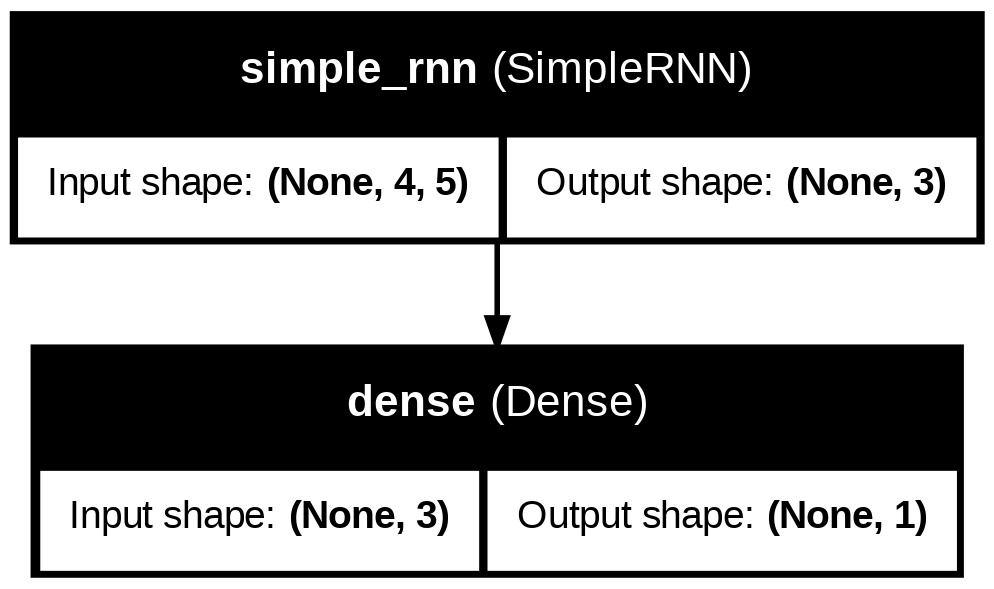

In [5]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
model.get_weights()

[array([[ 0.62095636,  0.70432705,  0.6346927 ],
        [ 0.41490453, -0.7673257 ,  0.13656503],
        [-0.21810466, -0.09058559, -0.8590168 ],
        [-0.13462538, -0.41864917, -0.54798853],
        [-0.8001191 ,  0.32861966, -0.6194848 ]], dtype=float32),
 array([[-0.48338175, -0.4552956 , -0.747695  ],
        [ 0.6278392 , -0.7755109 ,  0.06633806],
        [ 0.61004907,  0.4373657 , -0.66072035]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.9108554],
        [-0.935248 ],
        [-1.068535 ]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
import numpy as np

docs = ['go india',
        'india india',
        'hip hip hooray',
        'kohli kohli']

In [9]:
!pip install -q keras

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='atg')
tokenizer.fit_on_texts(docs)

In [12]:
docs

['go india', 'india india', 'hip hip hooray', 'kohli kohli']

In [13]:
tokenizer.word_index

{'atg': 1, 'india': 2, 'hip': 3, 'kohli': 4, 'go': 5, 'hooray': 6}

In [14]:
tokenizer.word_counts

OrderedDict([('go', 1), ('india', 3), ('hip', 2), ('hooray', 1), ('kohli', 2)])

In [15]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[5, 2], [2, 2], [3, 3, 6], [4, 4]]

In [16]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences, padding='post')
sequences

array([[5, 2, 0],
       [2, 2, 0],
       [3, 3, 6],
       [4, 4, 0]], dtype=int32)